K-nearest neighbors is known as an instance-based learning algorithm because it relies completely on previous instances to make predictions. The k-nearest neighbors algorithm doesn't try to understand or capture the relationship between the feature columns and the target column. 

Google words
1 Instance based learning
2.Parametric machine learning 

https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

In [1]:
import pandas as pd 
data = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/AmesHousing.txt',delimiter='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
train = data[:1460]
test = data[1460:]
target ='SalePrice'

In [3]:

train = data[:1461]
test = data[1461:]
target ='SalePrice'

In [4]:
import matplotlib.pyplot as plt
# For prettier plots.
import seaborn

In [5]:
# Check the available styles
plt.style.available


['seaborn-talk',
 'grayscale',
 'bmh',
 'seaborn-paper',
 'seaborn',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn-poster',
 'seaborn-notebook',
 'seaborn-ticks',
 'fast',
 'ggplot',
 'dark_background',
 'fivethirtyeight',
 'tableau-colorblind10',
 'seaborn-muted',
 'seaborn-pastel',
 '_classic_test',
 'seaborn-dark-palette',
 'seaborn-deep',
 'seaborn-bright',
 'seaborn-whitegrid',
 'classic',
 'seaborn-white',
 'seaborn-dark',
 'seaborn-colorblind']

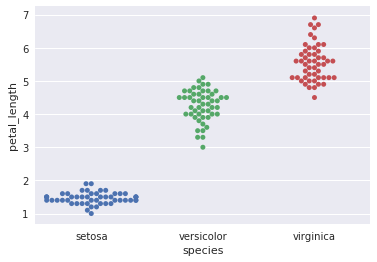

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset default params
sns.set()

# Set context to `"paper"`
sns.set_context("notebook")

# Load iris data
iris = sns.load_dataset("iris")

# Construct iris plot
sns.swarmplot(x="species", y="petal_length", data=iris)

# Show plot
#The four predefined contexts are "paper", "notebook", "talk" and "poster".
plt.show()

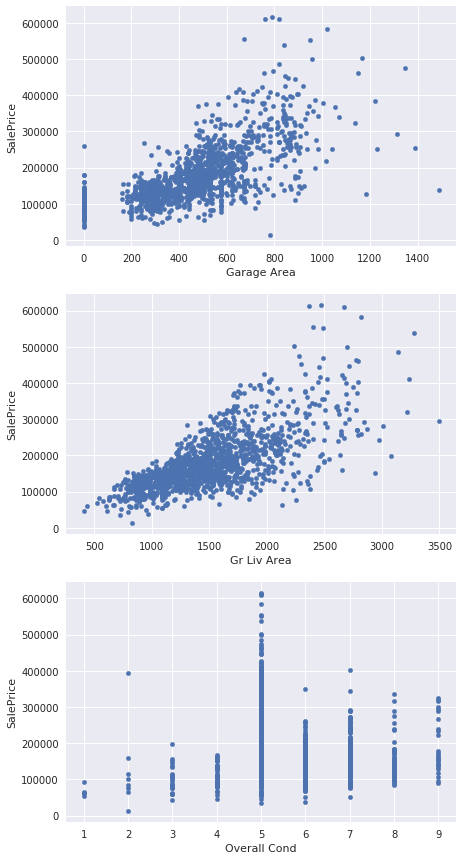

In [7]:

# For prettier plots.
#import seaborn
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

In [8]:
# checking the correalation observed from the above graph with the correlation matrix
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()
# try to write your own co relation function here

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465781,-0.132742,0.662727
Gr Liv Area,0.465781,1.000000,-0.133996,0.699218
Overall Cond,-0.132742,-0.133996,1.000000,-0.099760
SalePrice,0.662727,0.699218,-0.099760,1.000000


### Using scikit-learn to predict
Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. Because we're familiar with the scikit-learn workflow for k-nearest neighbors, switching to using linear regression is straightforward.

Instead of working with the sklearn.neighbors.KNeighborsRegressors class, we work with the sklearn.linear_model.LinearRegression class. The LinearRegression class also has it's own fit() method. Specific to this model, however, is the coef_ and intercept_ attributes, which return a1
(a1 to an if it were a multivariate regression model) and a0 accordingly

In [9]:
# training on "one" vairable
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[ 116.92461444]
5307.90844844


One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

### Making predections

In [17]:


# what about mesuaring the fit?
# how good the model is ?
# rss - this metric residual sum of square ie is rmse
from sklearn import linear_model
import numpy as np

lr = linear_model.LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56025.4850287
57100.1839868


### Using 2 columns for training

In [18]:
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56023.4304525
57078.4509982


### Not much of a change in the rmse values after training model on two features

### Feature selection

In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. In this mission, we'll explore how to use correlation between features and the target column, correlation between features, and variance of features to select features. We'll continue working with the same housing dataset from the last mission.

We'll specifically focus on selecting from feature columns that don't have any missing values or don't need to be transformed to be useful (e.g. columns like Year Built and Year Remod/Add). We'll explore how to deal with both of these in a later mission in this course.

To start, let's look at which columns fall into either of these two categories.
instructions

    Drop the following columns from numerical_train:
        PID (place ID isn't useful for modeling)
        Year Built
        Year Remod/Add
        Garage Yr Blt
        Mo Sold
        Yr Sold
    Calculate the number of missing values from each column in numerical_train. Create a Series object where the index is made up of column names and the associated values are the number of missing values:

    Order                0

    PID                  0

    MS SubClass          0
    
    MS Zoning            0


    Assign this Series object to null_series. Select the subset of null_series to keep only the columns with no missing values, and assign the resulting Series object to full_cols_series.
    Display full_cols_series using the print() function.


In [30]:
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(dict(null_series))
print((full_cols_series))

{'Half Bath': 0, 'TotRms AbvGrd': 0, 'Bedroom AbvGr': 0, 'MS SubClass': 0, 'Enclosed Porch': 0, '1st Flr SF': 0, 'Kitchen AbvGr': 0, 'Overall Qual': 0, 'Bsmt Full Bath': 1, 'Mas Vnr Area': 11, 'Open Porch SF': 0, 'Low Qual Fin SF': 0, 'BsmtFin SF 2': 1, 'BsmtFin SF 1': 1, '3Ssn Porch': 0, 'SalePrice': 0, 'Bsmt Half Bath': 1, 'Bsmt Unf SF': 1, 'Screen Porch': 0, 'Lot Frontage': 250, 'Order': 0, 'Fireplaces': 0, 'Garage Area': 0, 'Total Bsmt SF': 1, 'Full Bath': 0, 'Gr Liv Area': 0, 'Lot Area': 0, 'Wood Deck SF': 0, 'Garage Cars': 0, 'Pool Area': 0, 'Overall Cond': 0, 'Misc Val': 0, '2nd Flr SF': 0}
Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF    

## Correlating Feature Columns With Target Column

In the last mission, we selected the feature for the simple linear regression model by comparing how some of the features correlate with the target column. If you recall, we focused on 4 features in particular and used the pandas.DataFrame.corr() method to return the correlation coefficients between each pairs of columns. This means that the correlation matrix for 4 columns results in 16 correlation values:

train[['GarageArea', 'GrLivArea', 'OverallCond', 'SalePrice']].corr()

                 GarageArea  GrLivArea  OverallCond  SalePrice

    GarageArea     1.000000   0.468997    -0.151521   0.623431

    GrLivArea      0.468997   1.000000    -0.079686   0.708624

    OverallCond   -0.151521  -0.079686     1.000000  -0.077856

    SalePrice      0.623431   0.708624    -0.077856   1.000000

The subset of features we want to focus on, full_cols_series, contains 27 columns:

     len(full_cols_series)

        25

The resulting correlation matrix will contain 27 * 27 or 729 correlation values. Comparing and contrasting this many values is incredibly difficult. Let's instead focus on just how the feature columns correlate with the target column (SalePrice) instead.

In [32]:
#train_subset = train[full_cols_series.index]
len(full_cols_series)


25

In [33]:
print( full_cols_series.index)

Index(['Order', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')


In [28]:
numerical_train.head(2)
# selecting the desired numeric and non null columns
# It contains all the (around 20) variables. Is everyone useful
# FInd the Correlation matrix with strongest correlation with sale price

#selecting the desired columns
train_subset = numerical_train[full_cols_series.index]

# now check for correlation
corr_matrix = train_subset.corr()
corr_matrix


,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Order,1.000000,-0.023027,0.020019,-0.046565,0.077852,-0.059538,0.011691,0.016296,-0.035269,-0.073896,...,-0.056069,-0.050011,-0.063622,0.036696,0.012584,0.006587,0.025726,0.020664,-0.020558,-0.066650
MS SubClass,-0.023027,1.000000,-0.248209,0.054560,-0.099880,-0.273187,0.342218,-0.001082,0.089601,0.168268,...,-0.046839,-0.110027,-0.034916,0.000647,0.009758,-0.051777,-0.065969,-0.022697,-0.023727,-0.088398
Lot Area,0.020019,-0.248209,1.000000,0.100116,-0.010344,0.295953,0.005398,-0.013666,0.239133,0.107719,...,0.166762,0.179113,0.109980,0.044280,0.002103,0.022091,0.054122,0.010442,0.025430,0.274576
Overall Qual,-0.046565,0.054560,0.100116,1.000000,-0.084173,0.490101,0.200614,-0.070393,0.563276,0.505382,...,0.609951,0.581653,0.260724,0.320877,-0.173290,0.032548,0.022764,0.072216,-0.009780,0.804695
Overall Cond,0.077852,-0.099880,-0.010344,-0.084173,1.000000,-0.155073,-0.009936,-0.015772,-0.133996,-0.223253,...,-0.156421,-0.132742,0.044942,-0.014141,0.052888,0.033959,0.064688,-0.013409,0.047388,-0.099760
1st Flr SF,-0.059538,-0.273187,0.295953,0.490101,-0.155073,1.000000,-0.311359,-0.011817,0.515561,0.341261,...,0.441540,0.477463,0.206208,0.192217,-0.118254,0.053475,0.120148,0.092451,-0.000589,0.657192
2nd Flr SF,0.011691,0.342218,0.005398,0.200614,-0.009936,-0.311359,1.000000,-0.017867,0.648075,0.396336,...,0.169732,0.100885,0.086297,0.190072,0.074378,-0.038250,-0.014408,-0.020840,0.002205,0.202709
Low Qual Fin SF,0.016296,-0.001082,-0.013666,-0.070393,-0.015772,-0.011817,-0.017867,1.000000,0.075451,-0.013944,...,-0.047580,-0.049516,-0.029516,-0.014065,0.144112,-0.000755,-0.026788,-0.002484,-0.007261,-0.060401
Gr Liv Area,-0.035269,0.089601,0.239133,0.563276,-0.133996,0.515561,0.648075,0.075451,1.000000,0.626172,...,0.499182,0.465781,0.238702,0.322291,-0.012847,0.008164,0.080034,0.054658,0.000778,0.699218
Full Bath,-0.073896,0.168268,0.107719,0.505382,-0.223253,0.341261,0.396336,-0.013944,0.626172,1.000000,...,0.468656,0.403107,0.180634,0.256398,-0.139532,0.043436,-0.037414,-0.027153,-0.020710,0.518481


In [36]:

# we can do that by index as the matirx returned by corr methods contains indexed also
#so select index having correlation coefficient values greater than 6 
# CHECK what corr returned, althoug it returs a data frame , but  no column name it can be inserted 
# But we can do something to extract the columns with corr value > 0.6
Sale_series = corr_matrix['SalePrice']
column = Sale_series.abs().sort_values()
print(column)

Misc Val           0.009988
3Ssn Porch         0.038588
Low Qual Fin SF    0.060401
Order              0.066650
MS SubClass        0.088398
Overall Cond       0.099760
Screen Porch       0.099836
Bedroom AbvGr      0.107043
Kitchen AbvGr      0.130960
Pool Area          0.145380
Enclosed Porch     0.166090
2nd Flr SF         0.202709
Half Bath          0.273595
Lot Area           0.274576
Wood Deck SF       0.319417
Open Porch SF      0.344962
TotRms AbvGrd      0.483749
Fireplaces         0.485892
Full Bath          0.518481
1st Flr SF         0.657192
Garage Area        0.662727
Garage Cars        0.663897
Gr Liv Area        0.699218
Overall Qual       0.804695
SalePrice          1.000000
Name: SalePrice, dtype: float64


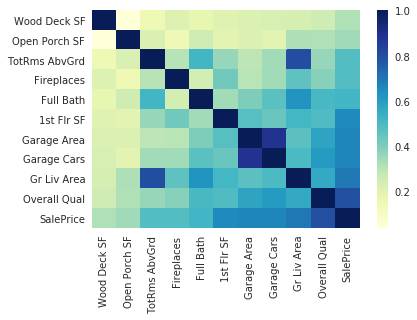

In [38]:
# now get the desired columns name from the index of the series
features = column[column > 0.3].index
#now the for heat map  we are selecting the strong features having correlating coefficient greater than 6
import seaborn as sns
Strong_corr_df = train_subset[features]
strong_corr_m = Strong_corr_df.corr()
sns.heatmap(strong_corr_m ,cmap="YlGnBu")
plt.show()


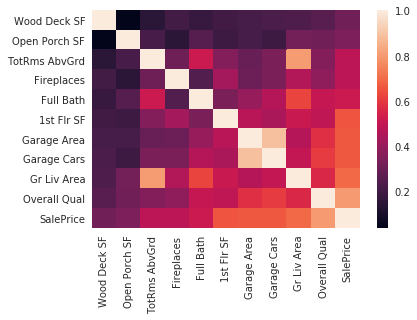

In [29]:
# another way
import seaborn as sns
import matplotlib.pyplot as plt
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)
plt.show()

### Note that Garage cars strongly correlate with Garage area and Gr Live area with TotRms AbvGrd  

## Observation 
Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

    Gr Liv Area and TotRms AbvGrd
    Garage Area and Garage Cars

If we read the descriptions of these columns from the data documentation, we can tell that each pair of column reflects very similar information. Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, let's drop the TotRms AbvGrd and Garage Cars.

The last thing we'll need to do is confirm that the test set contains no missing values for these columns:

# Task4
        Filter the test data frame so it only contains the columns from final_corr_cols.index. Then, drop 
        the row containing missing values and assign the result to clean_test.
    
    1.Build a linear regression model using the features in features.
    2.Calculate the RMSE on the test and train sets.
    3.Assign the train RMSE to train_rmse and the test RMSE to test_rmse.


In [115]:
final_corrs_df = Strong_corr_df.drop(['Garage Cars','TotRms AbvGrd'], axis = 1)
final_corrs_df.info()
final_corrs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
Wood Deck SF     1461 non-null int64
Open Porch SF    1461 non-null int64
Fireplaces       1461 non-null int64
Full Bath        1461 non-null int64
1st Flr SF       1461 non-null int64
Garage Area      1461 non-null float64
Gr Liv Area      1461 non-null int64
Overall Qual     1461 non-null int64
SalePrice        1461 non-null int64
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
0,210,62,2,1,1656,528.0,1656,6,215000
1,140,0,0,1,896,730.0,896,5,105000
2,393,36,0,1,1329,312.0,1329,6,172000
3,0,0,2,2,2110,522.0,2110,7,244000
4,212,34,1,2,928,482.0,1629,5,189900


In [116]:
# removing the target vaiable from the dataset
features = final_corrs_df.drop(['SalePrice'],axis=1)
features_cols = list( features.columns)
#print(features_cols)

## Preparing the test data
clean_test = test[final_corrs_df.columns].dropna()
clean_test.head()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
1461,182,35,1,2,1786,715.0,1786,8,300000
1462,0,0,1,2,1149,779.0,2290,8,255900
1463,0,63,0,2,884,543.0,1768,7,224900
1464,0,57,1,2,1129,596.0,2327,7,240000
1465,0,45,0,2,798,595.0,1640,7,183000


In [117]:
final_corrs_df.head()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
0,210,62,2,1,1656,528.0,1656,6,215000
1,140,0,0,1,896,730.0,896,5,105000
2,393,36,0,1,1329,312.0,1329,6,172000
3,0,0,2,2,2110,522.0,2110,7,244000
4,212,34,1,2,928,482.0,1629,5,189900


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(final_corrs_df[features_cols],final_corrs_df['SalePrice'])

#predections
train_predictions = lr.predict(final_corrs_df[features_cols])
test_predictions = lr.predict(clean_test[features_cols])

train_mse = mean_squared_error(train_predictions,final_corrs_df['SalePrice'])
train_rmse = train_mse ** 0.5
print(train_rmse)


test_mse = mean_squared_error(test_predictions,clean_test['SalePrice'])
test_rmse = test_mse ** 0.5
print(test_rmse)
# out put are accoding to the system

34169.2655389
41040.6328101


In [119]:
features = final_corrs_df.columns

### Removing low variance features

## Task 5
The last technique we'll explore is removing features with low variance. When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of 0. This would mean that all of the values in that column were exactly the same. This means that the column isn't informative and isn't going to help the model make better predictions.

To make apples to apples comparisons between columns, we need to rescale all of the columns to vary between 0 and 1. Then, we can set a cutoff value for variance and remove features that have less than that variance amount. This is known as min-max scaling or as rescaling. Here's the formula for rescaling:

x−min(x)/max(x)−min(x)

Where
x
is an individual value
min(x)
is the minimum value for the column x
belongs to
max(x)
is the maximum value for the column x belongs to

In [120]:
unit_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())
print(unit_train.min())
print(unit_train.max())
# Confirmed: the min and max values are 0.0 and 1.0 respectively

sorted_vars = unit_train.var().sort_values() # variance and sorting
print(sorted_vars)

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
SalePrice        0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
SalePrice        1.0
dtype: float64
Open Porch SF    0.013939
SalePrice        0.016946
Full Bath        0.018616
Garage Area      0.020352
Gr Liv Area      0.023078
Overall Qual     0.024550
1st Flr SF       0.025802
Wood Deck SF     0.033051
Fireplaces       0.046570
dtype: float64


To wrap up this mission, let's set a cutoff variance of 0.015, remove the Open Porch SF feature, and train and test a model using the remaining features.

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

## adjust the feature column to reflext the change
x = final_corrs_df.drop(['SalePrice'],axis=1)
features = x.drop(['Open Porch SF'],axis=1)
features_cols = list( features.columns)


lr.fit(final_corrs_df[features_cols],final_corrs_df['SalePrice'])

#predections
train_predictions = lr.predict(final_corrs_df[features_cols])
test_predictions = lr.predict(clean_test[features_cols])

train_mse = mean_squared_error(train_predictions,final_corrs_df['SalePrice'])
train_rmse = train_mse ** 0.5
print(train_rmse)


test_mse = mean_squared_error(test_predictions,clean_test['SalePrice'])
test_rmse = test_mse ** 0.5
print(test_rmse)
# out put are accoding to the system

34366.9457464
40601.8645639


We were able to improve the RMSE value to approximately 40591 by removing the Open Porch SF feature. This is most likely the furthest we can go without transforming and utilizing the other features in the dataset so we'll stop here for now. In the next 2 missions, we'll explore 2 different ways of fitting models. Afterwards, we'll explore ways to clean and engineer new features from the existing features to improve model accuracy even further.

### Gradient descent

In mathematical optimization, a function that we optimize through minimization is known as a cost function or sometime as the loss function.

MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} (a_1x_1^{(i)} - y^{(i)} ) ^2

try to write above line correctly in mark up 
in short we are finding only one variabel here ie is m for equation y=mx + c

Finish implementing the derivative() function:

    This function should return the derivative at the current value of.
    Assign the list of iterations for the parameter to param_iterations, and assign the last iteration for to final_param.

In [123]:
def derivative(a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    # below line is the calucation of loss function and its derivative
    for i in range( 0,len_data):
        error = error + xi_list[i]* ( a1 * xi_list[i] - yi_list[i] )
    deriv = 2 * error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = []
    a1_list.append(a1_initial)
    for i in range(0, max_iterations):
        a1 = a1_list[i]
        # calculating the derivative of cost function with respect  to a1 whcih is intial now
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)


param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150)
final_param = param_iterations[-1]
x = len(param_iterations)
print( final_param)

120.164052695


# Instructions

    Implement the a0_derivative() function, which implements the gradient for a0



In [125]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0,len_data):
        error = error + (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2 *error /len_data    
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)

# Uncomment when ready.
a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 2000, .3, 100, 100)
print (a0_params[-1])
print(a1_params[-1])

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


nan
nan


### Note optimazatio depends on the inital value and the learning rate

https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/

### Transforming features

https://en.wikipedia.org/wiki/Feature_engineering

In [132]:
data = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()
print(train_null_counts)
df_no_nv = train[train_null_counts[train_null_counts==0].index]
#print(df_no_mv.head())

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       249
Lot Area             0
Street               0
Alley             1351
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        11
Mas Vnr Area        11
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu       717
Garage Type         74
Garage Yr Blt       75
Garage Finish       75
Garage Cars          0
Garage Area          0
Garage Qual

In [133]:
train['Utilities'].value_counts()

AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [134]:
train['Street'].value_counts()

Pave    1455
Grvl       5
Name: Street, dtype: int64

In [135]:
train['House Style'].value_counts()

1Story    743
2Story    440
1.5Fin    160
SLvl       60
SFoyer     35
2.5Unf     11
1.5Unf      8
2.5Fin      3
Name: House Style, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/categorical.html

In [145]:
train['Utilities'] = train['Utilities'].astype(dtype='category')

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
train['Utilities'].head(10)

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
5    AllPub
6    AllPub
7    AllPub
8    AllPub
9    AllPub
Name: Utilities, dtype: category
Categories (3, object): [AllPub, NoSeWa, NoSewr]

In [148]:
train['Utilities'].head(10).cat.codes

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int8


    Convert all of the text columns in train to the categorical data type.
    Select the Utilities column, return the categorical codes, and display the unique value counts for those codes: train['Utilities'].cat.codes.value_counts()


In [146]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns

for col in text_cols:
    #print(col+":", len(train[col].unique()))
    train[col] = train[col].astype('category')
    
train['Utilities'].cat.codes.value_counts()    

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0    1457
2       2
1       1
dtype: int64

In [149]:
print( train.shape ) 

(1460, 82)


When we convert a column to the categorical data type, pandas assigns a number from 0 to n-1 (where n is the number of unique values in a column) for each value. The drawback with this approach is that one of the assumptions of linear regression is violated here. Linear regression operates under the assumption that the features are linearly correlated with the target column. For a categorical feature, however, there's no actual numerical meaning to the categorical codes that pandas assigned for that colum. An increase in the Utilities column from 1 to 2 has no correlation value with the target column, and the categorical codes are instead used for uniqueness and exclusivity (the category associated with 0 is different than the one associated with 1).

In [150]:
dummy_cols = pd.DataFrame()
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]
    
    
print( train.shape )    

(1460, 236)


n the last few screens, we focused on categorical values that were represented as text columns. Some of the numerical columns in the data set are also categorical and only have a limited set of unique values. 

In [152]:
train[['Year Remod/Add', 'Year Built']].head(10)

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997
5,1998,1998
6,2001,2001
7,1992,1992
8,1996,1995
9,1999,1999


In [153]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']


    Select only the columns from train that contain more than 0 missing values but less than 584 missing values. Assign the resulting data frame to df_missing_values.
    Display the number of missing values for each column in df_missing_values.
    Display the data type for each column in df_missing_values.


In the next few screens, we'll focus on handling columns with missing values. When values are missing in a column, there are two main approaches we can take:

    Remove rows containing missing values for specific columns
        Pro: Rows containing missing values are removed, leaving only clean data for modeling
        Con: Entire observations from the training set are removed, which can reduce overall prediction accuracy
    Impute (or replace) missing values using a descriptive statistic from the column
        Pro: Missing values are replaced with potentially similar estimates, preserving the rest of the observation in the model.
        Con: Depending on the approach, we may be adding noisy data for the model to learn

Given that we only have 1460 training examples (with ~80 potentially useful features), we don't want to remove any of these rows from the dataset. Let's instead focus on imputation techniques.

We'll focus on columns that contain at least 1 missing value but less than 365 missing values (or 25% of the number of rows in the training set). There's no strict threshold, and many people instead use a 50% cutoff (if half the values in a column are missing, it's automatically dropped). Having some domain knowledge can help with determining an acceptable cutoff value.

In [155]:
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()
df_missing_values = train[train_null_counts[(train_null_counts>0) & (train_null_counts<584)].index]

print(df_missing_values.isnull().sum())
print(df_missing_values.dtypes)

Lot Frontage      249
Mas Vnr Type       11
Mas Vnr Area       11
Bsmt Qual          40
Bsmt Cond          40
Bsmt Exposure      41
BsmtFin Type 1     40
BsmtFin SF 1        1
BsmtFin Type 2     41
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Qual        75
Garage Cond        75
dtype: int64
Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
dtype: object


In [156]:
float_cols = df_missing_values.select_dtypes(include=['float'])
float_cols = float_cols.fillna(float_cols.mean())
print(float_cols.isnull().sum())

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64
